<img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº2
#### Alumno: Mauro Fernández

# 1. Consigna

Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT):

\begin{equation}
X_k=\sum_{N=0}^{N-1}x_n.e^{-j\,2\pi.k.n/N}
\end{equation}

El algoritmo debe poderse invocar de la siguiente manera:

<center><code>XX = mi_funcion_DFT(xx)</code></center>

Siendo:
* xx: señal a analizar, una matriz (Nx1) de números reales. 
* XX: DFT de xx, una matriz (Nx1) de números complejos.

Aprovechando que tenemos un generador de senoidales funcionando, y recordando que la DFT de una senoidal de frecuencia f0, será una delta de Kronecker posicionada en la frecuencia f0. Validar función con esta experiencia.

**Bonus**: 
* Probar las mismas experiencias con la transformada rápida de Fourier (DFT rápida se llama FFT).
* Calcular la DFT de una señal aleatoria, por ejemplo ruido uniforme de varianza σ² = 4

# 2. Resolución
En la siguiente sección se implementa el algortimo solicitado.
## 2.1. Transformada discreta de Fourier (DFT)

In [164]:
import numpy as np

def mi_funcion_DFT(xx):
    """Calcula la Transformada Discreta de Fourier (DFT) de una señal recibida como parámetro
    
    Args:
        xx (float[nn]): señal a analizar, una matriz (Nx1) de números reales. 

    Returns:
        XX (float[nn]): DFT de xx, una matriz (Nx1) de números complejos.
    """
    nn = xx.shape[0]
    
    # Generamos un array con ceros para guardar las amplitudes en frecuencia
    X = np.array([0+0j]).repeat(nn)
    
    for k in range(0,nn-1):
        for n in range(0,nn-1):
            X[k] += xx[n] * np.exp((-1j)*2*np.pi*(k*n)/nn)

    return X

# 3. Implementación
En la siguiente sección se generan diversas señales con diferentes configuraciones para verificar el correcto funcionamiento del algoritmo implementado.


## 3.1. Inicialización

In [165]:
# Importamos desde biblioteca PDS generadores de señales realizados previamente 
from pds import mi_funcion_sen, mi_funcion_square

# Importamos biblioteca para gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl

# Importamos biblioteca para cálculo de fft
from scipy.fft import fft

# Importamos datetime para medir tiempos de ejecución de algoritmos
from datetime import datetime

# Configuración del tamaño de fuente
fig_font_size = 14
plt.rcParams.update({'font.size':fig_font_size})

## 3.2. DFT y FFT de una señal senoidal
En la siguiente sección se implementa el algoritmo DFT y se compara su rendimiento frente al algoritmo FFT para transformar una señal senoidal.

### 3.2.1. Generamos y graficamos señal senoidal

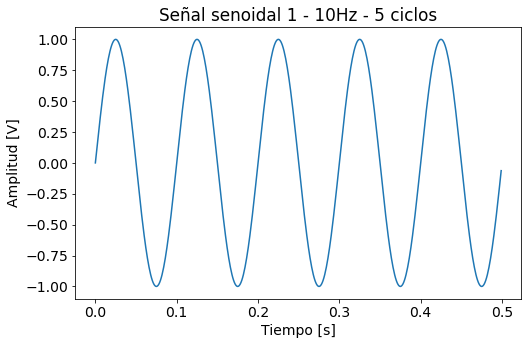

In [166]:
# Definimos parámetros de la señal senoidal
vmax = 1      # Amplitud [V]
dc   = 0      # Valor Medio [V]
f0   = 10     # Frecuencia [Hz]
ph   = 0      # Fase [rad]
N    = 100*5  # N° muestras ADC
fs   = 1000   # Frecuencia de muestreo ADC [Hz] 

# Generamos señal utilizando los parámetros definidos
tt, xx = mi_funcion_sen(vmax = vmax, dc = dc, ff = f0, ph = ph, nn = N, fs = fs)
    
# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (8,5)

# Graficación de señal en el dominio del tiempo
plt.plot(tt, xx)
plt.title('Señal senoidal 1 - 10Hz - 5 ciclos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()

### 3.2.2. Calculamos DFT y FFT de la señal senoidal (comparando tiempo de ejecución)

In [167]:
# Tomamos marca temporal de antes de ejecutar el algoritmo DFT
dt_ini_dft = datetime.now()

# Obtenemos la transformada discreta de Fourier (DFT) de la señal
XX_dft = mi_funcion_DFT(xx)

# Tomamos marca temporal después de ejecutar el algoritmo DFT
dt_end_dft = datetime.now()

# Tomamos marca temporal de antes de ejecutar el algoritmo FFT
dt_ini_fft = datetime.now()

# Obtenemos la transformada rápida de Fourier (FFT) de la señal
XX_fft = fft(xx)

# Tomamos marca temporal después de ejecutar el algoritmo FFT
dt_end_fft = datetime.now()

# Calculamos el tiempo empleado en ejecutar los algoritmos (en ms)
dt_diff_dft = int((dt_end_dft - dt_ini_dft).total_seconds() * 1000)
dt_diff_fft = int((dt_end_fft - dt_ini_fft).total_seconds() * 1000)

print("DFT - TIEMPO DE EJECUCIÓN: {}ms".format(dt_diff_dft))
print("FFT - TIEMPO DE EJECUCIÓN: {}ms".format(dt_diff_fft))

DFT - TIEMPO DE EJECUCIÓN: 2377ms
FFT - TIEMPO DE EJECUCIÓN: 0ms


### 3.2.3. Graficamos DFT y FFT de la señal senoidal

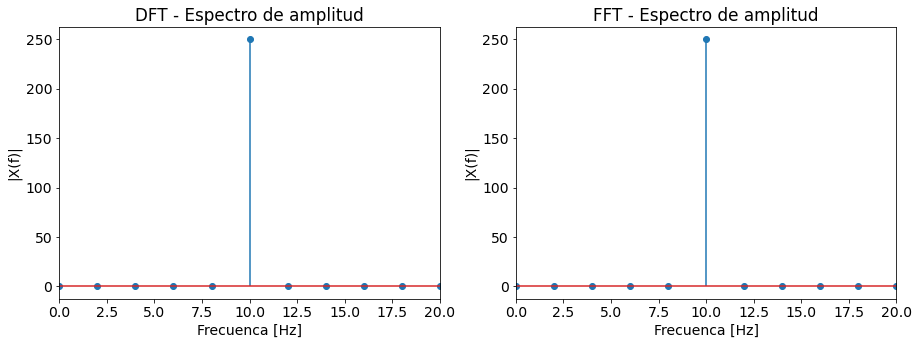

In [168]:
# Calculamos el paso frecuencial
df = 1/(N*(1/fs))

# Generamos base de frecuencias para graficar DFT
ff = np.linspace(0, (N-1), num=N) * df

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (15,5)

# Graficación de señal en el dominio de la frecuencia
figure, axes = plt.subplots(nrows=1, ncols=2)

axes[0].stem(ff, np.abs(XX_dft))
axes[0].set_title('DFT - Espectro de amplitud')
axes[0].set_xlim([0,20])
axes[0].set_xlabel('Frecuenca [Hz]')
axes[0].set_ylabel('|X(f)|')

axes[1].stem(ff, np.abs(XX_fft))
axes[1].set_title('FFT - Espectro de amplitud')
axes[1].set_xlim([0,20])
axes[1].set_xlabel('Frecuenca [Hz]')
axes[1].set_ylabel('|X(f)|')

plt.show()

figure.tight_layout()

## 3.3. BONUS - DFT y FFT de una señal aleatoria ruido uniforme
En la siguiente sección se implementa el algoritmo DFT y se compara su rendimiento frente al algoritmo FFT para transformar una señal ruido uniforme.

### 3.3.1. Generamos y graficamos señal aleatoria

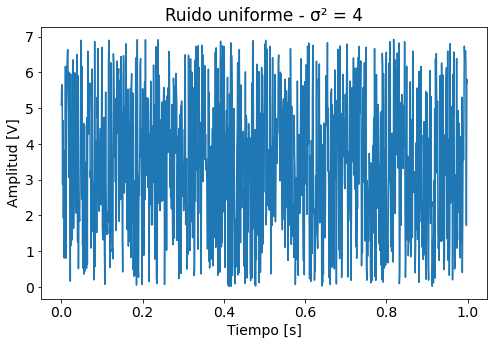

In [169]:
# Importamos de biblioteca PDS generador de señal aleatoria uniforme
from pds import mi_funcion_uniform

# Definimos parámetros de la señal aleatoria
var = 4    # varianza
N   = 1000 # N° muestras
fs  = 1000 # Frecuencia de muestreo

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (8,5)

# Generamos señal aleatoria uniforme
tt, xx = mi_funcion_uniform(var=4,nn=N,fs=fs)
    
# Graficación de señal en el dominio del tiempo
plt.plot(tt, xx)
plt.title('Ruido uniforme - σ² = 4')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.show()

### 3.3.2. Calculamos DFT y FFT de la señal aleatoria (comparando tiempo de ejecución)

In [170]:
# Tomamos marca temporal de antes de ejecutar el algoritmo DFT
dt_ini_dft = datetime.now()

# Obtenemos la transformada discreta de Fourier (DFT) de la señal
XX_dft = mi_funcion_DFT(xx)

# Tomamos marca temporal después de ejecutar el algoritmo DFT
dt_end_dft = datetime.now()

# Tomamos marca temporal de antes de ejecutar el algoritmo FFT
dt_ini_fft = datetime.now()

# Obtenemos la transformada rápida de Fourier (FFT) de la señal
XX_fft = fft(xx)

# Tomamos marca temporal después de ejecutar el algoritmo FFT
dt_end_fft = datetime.now()

# Calculamos el tiempo empleado en ejecutar los algoritmos (en ms)
dt_diff_dft = int((dt_end_dft - dt_ini_dft).total_seconds() * 1000)
dt_diff_fft = int((dt_end_fft - dt_ini_fft).total_seconds() * 1000)

print("DFT - TIEMPO DE EJECUCIÓN: {}ms".format(dt_diff_dft))
print("FFT - TIEMPO DE EJECUCIÓN: {}ms".format(dt_diff_fft))

DFT - TIEMPO DE EJECUCIÓN: 9089ms
FFT - TIEMPO DE EJECUCIÓN: 0ms


### 3.3.3. Graficamos DFT y FFT de la señal aleatoria

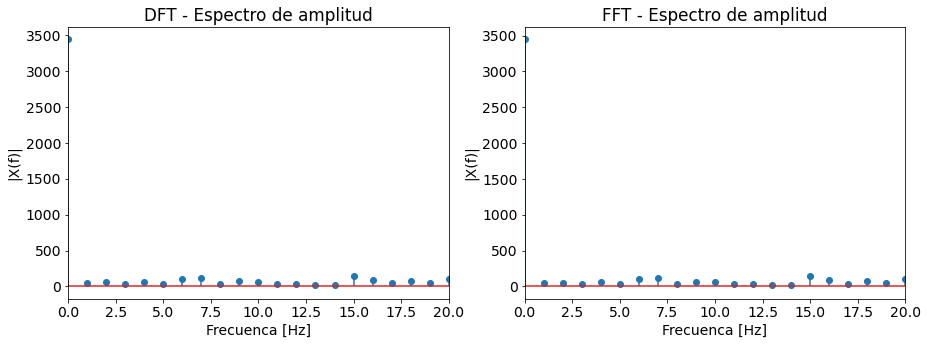

In [171]:
# Calculamos el paso frecuencial
df = 1/(N*(1/fs))

# Generamos base de frecuencias para graficar DFT
ff = np.linspace(0, (N-1), num=N) * df

# Configuración del tamaño de los gráficos
mpl.rcParams['figure.figsize'] = (15,5)

# Graficación de señal en el dominio de la frecuencia
figure, axes = plt.subplots(nrows=1, ncols=2)

axes[0].stem(ff, np.abs(XX_dft))
axes[0].set_title('DFT - Espectro de amplitud')
axes[0].set_xlim([0,20])
axes[0].set_xlabel('Frecuenca [Hz]')
axes[0].set_ylabel('|X(f)|')

axes[1].stem(ff, np.abs(XX_fft))
axes[1].set_title('FFT - Espectro de amplitud')
axes[1].set_xlim([0,20])
axes[1].set_xlabel('Frecuenca [Hz]')
axes[1].set_ylabel('|X(f)|')

plt.show()

figure.tight_layout()

## 4. Conclusiones
Como puede observarse en los resultados, el espectro obtenido utilizando FFT es idéntico al obtenido utilizando DFT, dado que ambos algoritmos se basan en los mismos principios teóricos. La diferencia es que FFT es un algoritmo optimizado en comparación a DFT, por lo que es más eficiente y emplea muchísimo menor tiempo de ejecución para obtener el espectro.